# 회귀분석 - 평균으로 돌아간다.

In [ ]:
# 보스턴 집값 데이터로 분석

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import koreanize_matplotlib

In [53]:
data = pd.read_excel('./data/boston.xlsx', header=1)

In [16]:
data

,범죄율,"25,000평방피트초과",비소매상업지역비율,찰스강경계,농축 일산화질소,가구당평균방수,1940년이전건축비율,직업센터접근성,도로접근성,재산세율,학생/교사비율,흑인비율,하위계층비율,주택가격
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


<Axes: >

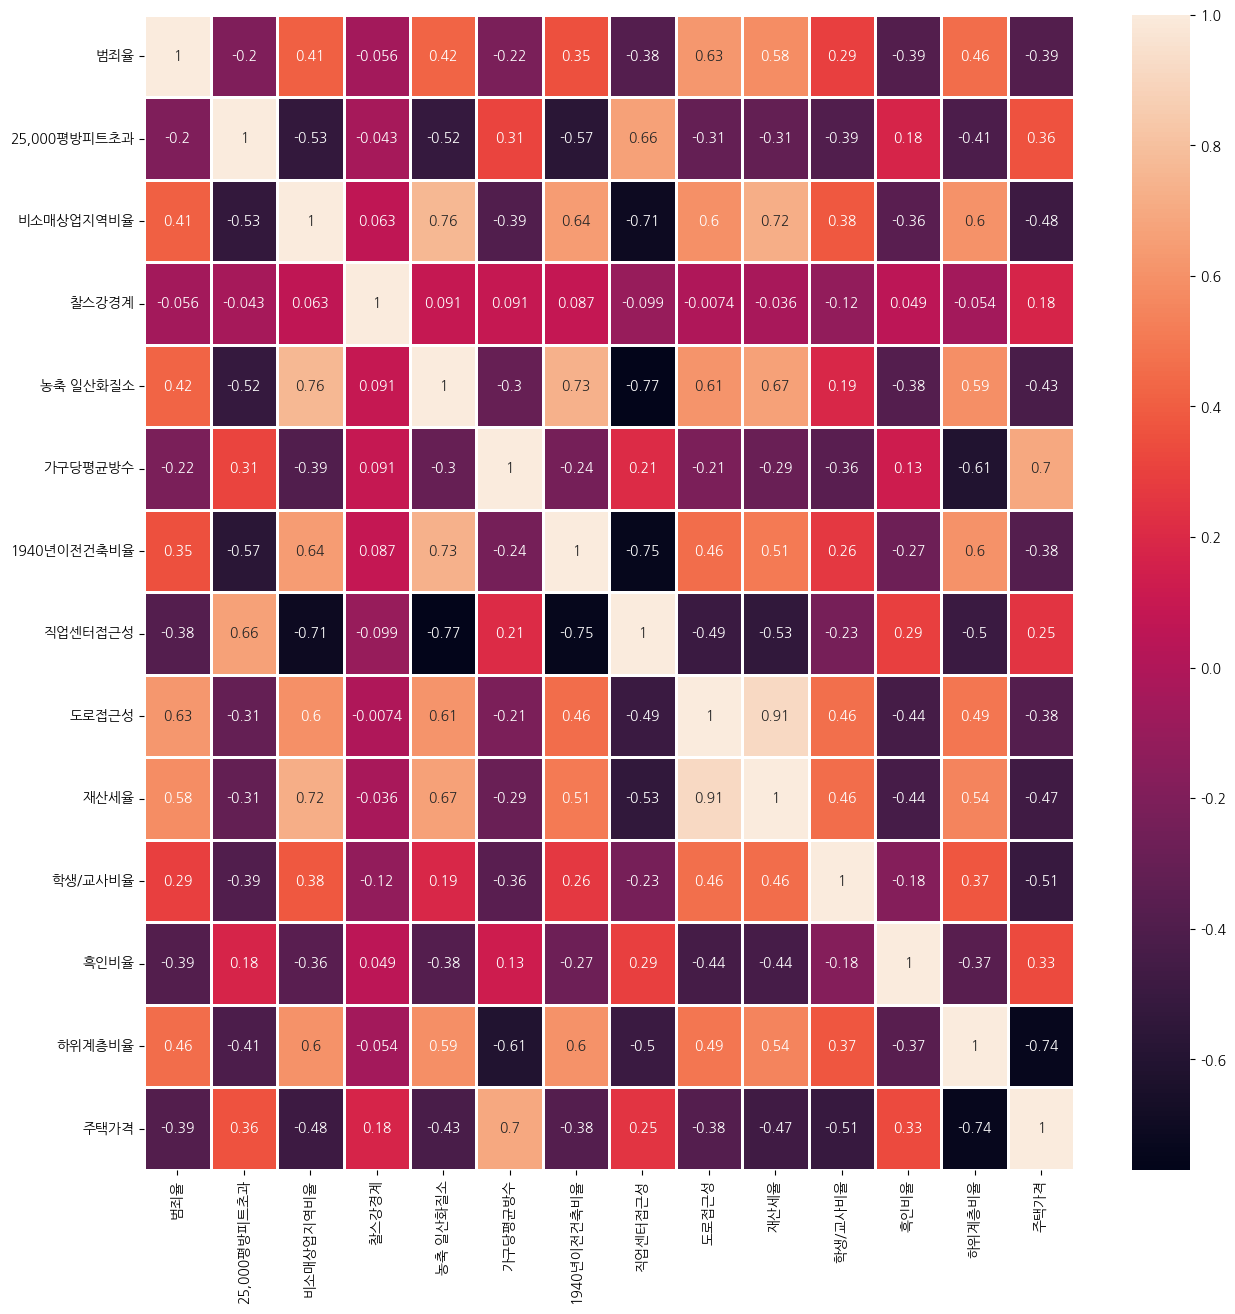

In [50]:
# 상관데이터 보기 
plt.figure(figsize=(15,15))
sns.heatmap(data.corr(), annot=True, linecolor='white', linewidth=1)

<Axes: xlabel='하위계층비율', ylabel='주택가격'>

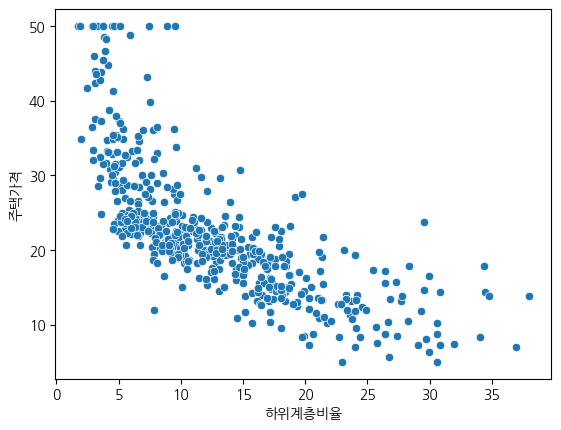

In [17]:
sns.scatterplot(data=data['주택가격'],x=data['하위계층비율'], y=data['주택가격'])

In [20]:
data.columns

Index(['범죄율', '25,000평방피트초과', '비소매상업지역비율', '찰스강경계', '농축 일산화질소', '가구당평균방수',
       '1940년이전건축비율', '직업센터접근성', '도로접근성', '재산세율', '학생/교사비율', '흑인비율', '하위계층비율',
       '주택가격'],
      dtype='object')

<Axes: xlabel='1940년이전건축비율', ylabel='농축 일산화질소'>

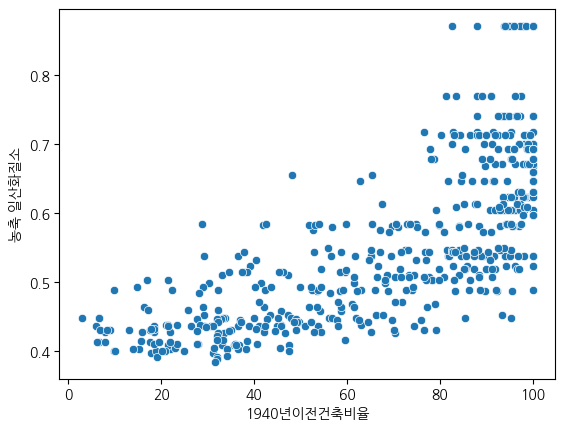

In [21]:
sns.scatterplot(data=data['주택가격'],x=data['1940년이전건축비율'], y=data['농축 일산화질소'])

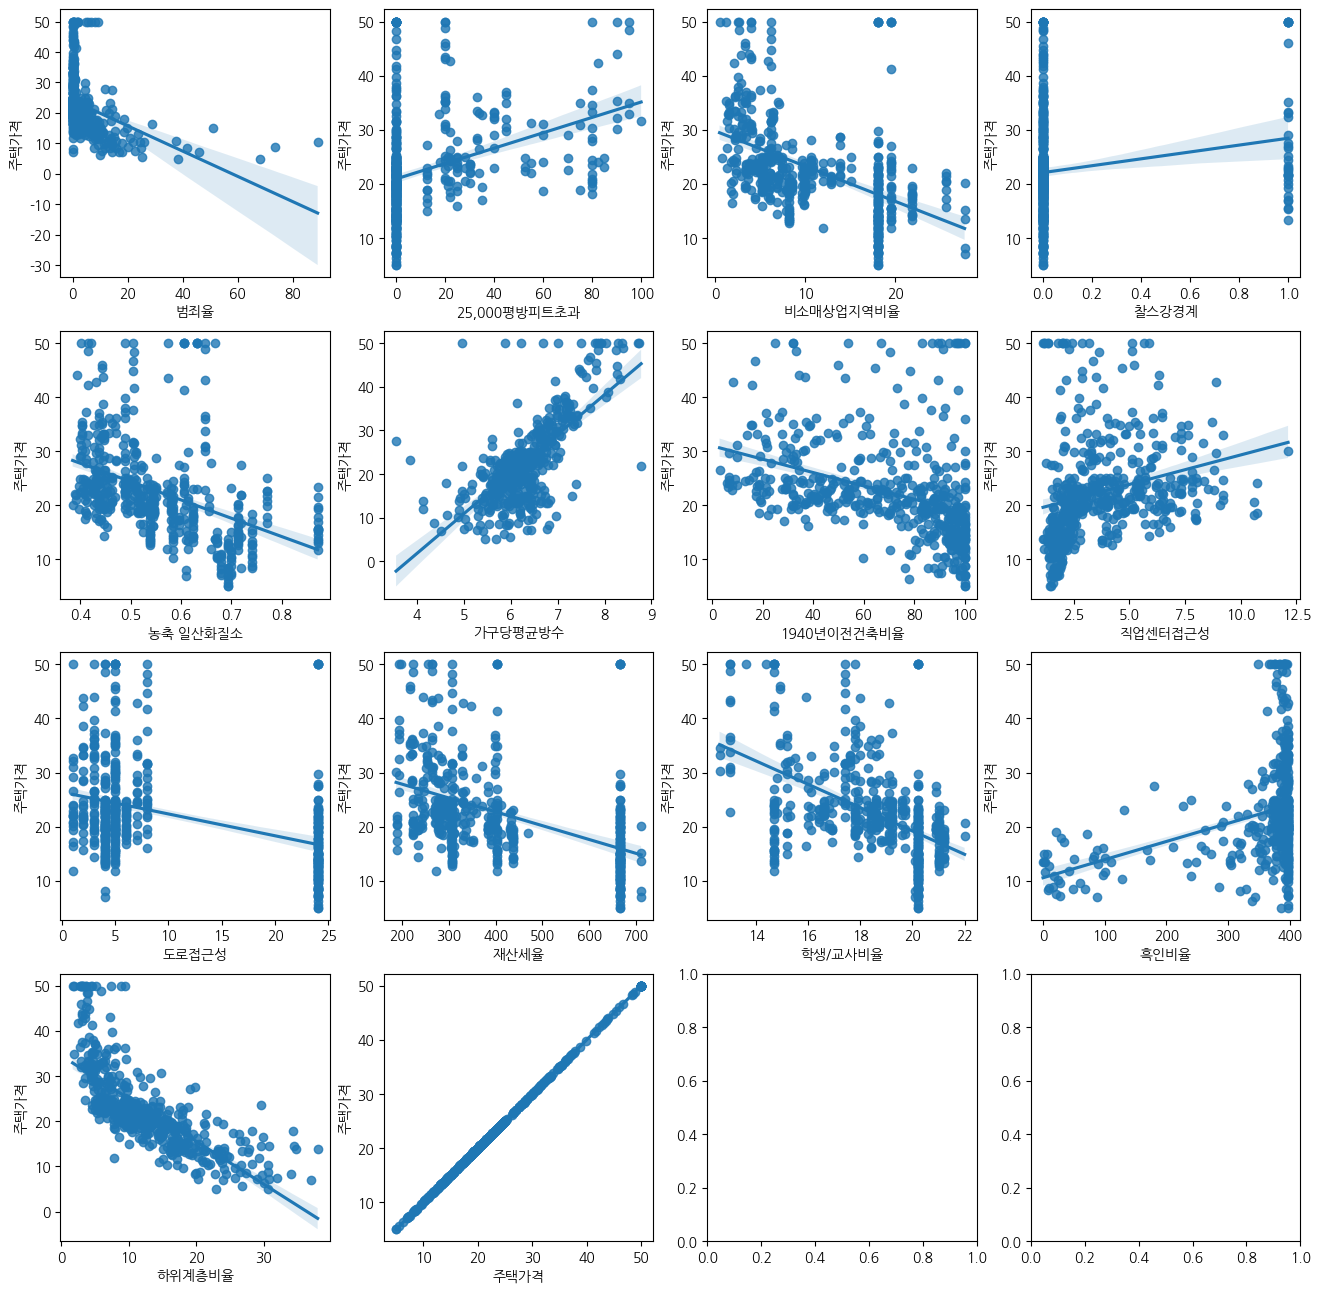

In [24]:
# 주택가격에 대한 각 독립변수의 산포도 그래프
fig, axs = plt.subplots(figsize=(16,16), ncols=4, nrows=4)
for i , feature in enumerate(data):
    row = int(i/4)
    col = i%4
    sns.regplot(data=data, x=feature, y='주택가격', ax=axs[row][col])

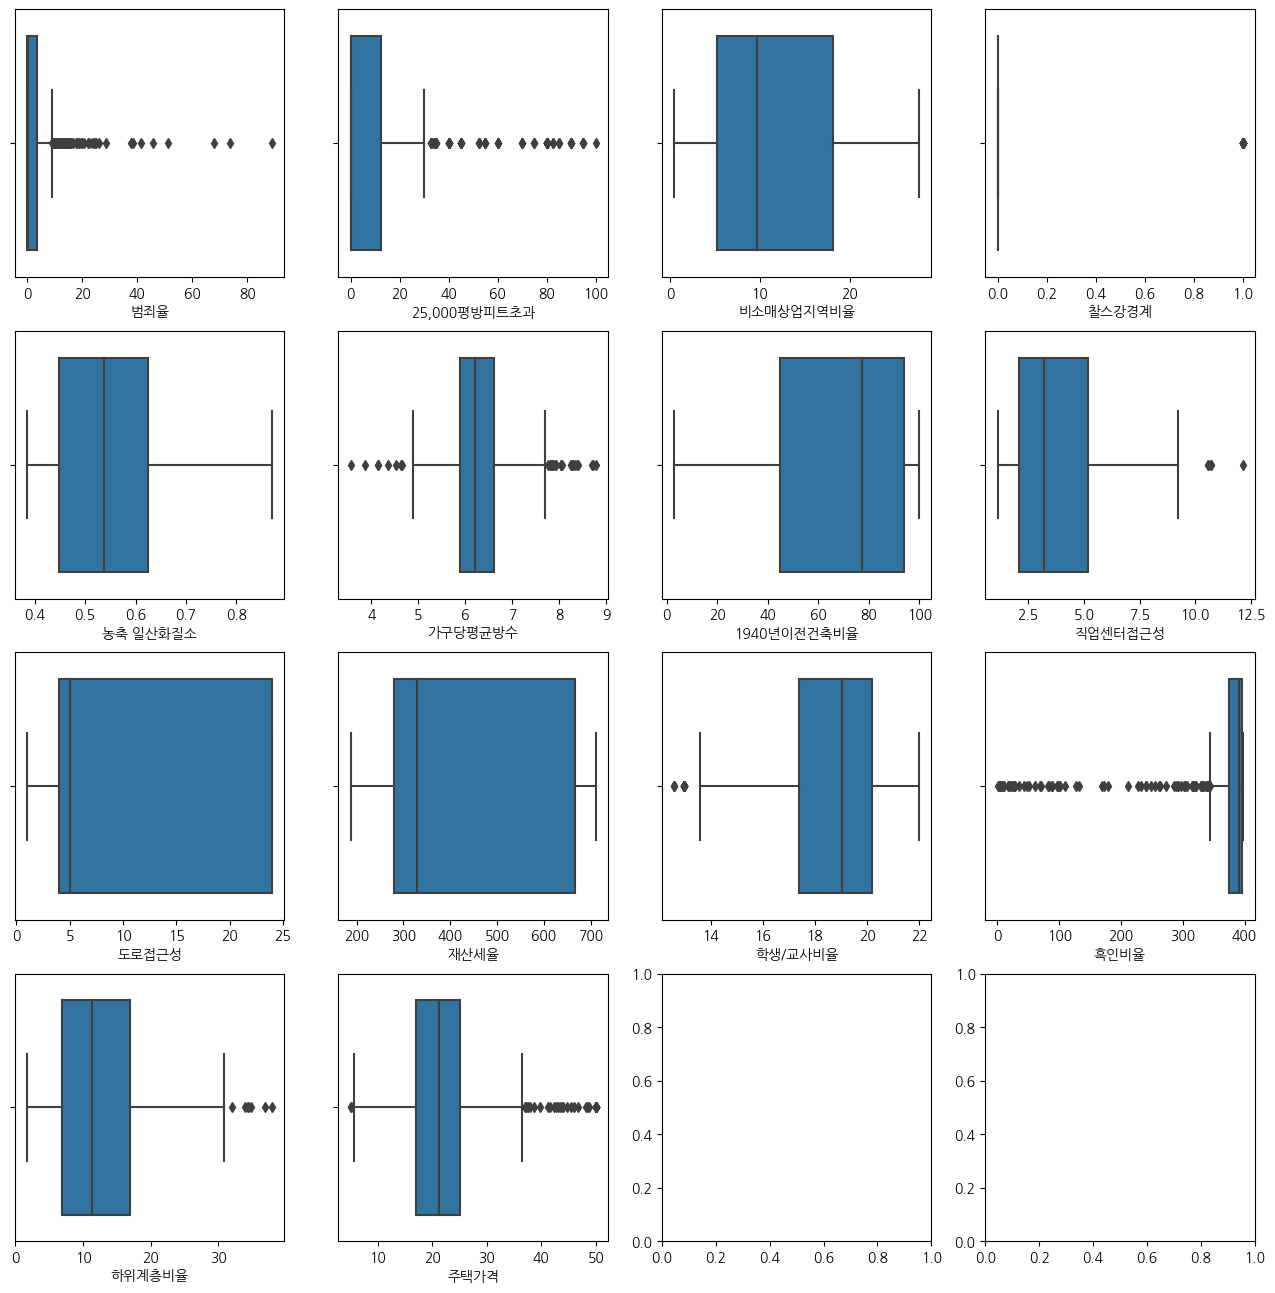

In [25]:
fig, axs = plt.subplots(figsize=(16,16), ncols=4, nrows=4)
for i , feature in enumerate(data):
    row = int(i/4)
    col = i%4
    sns.boxplot(x=data[feature], ax=axs[row][col])

 * 어떤 스케일링을 해야할까? 이상치가 많으니까 로버스트를 해야겠다!
 * 독립변수에 이상치가 많은 컬럼이 많으므로 로버스트 스케일러를 이용해서 스케일링

In [27]:
data.head()

,범죄율,"25,000평방피트초과",비소매상업지역비율,찰스강경계,농축 일산화질소,가구당평균방수,1940년이전건축비율,직업센터접근성,도로접근성,재산세율,학생/교사비율,흑인비율,하위계층비율,주택가격
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [29]:
X = data.drop('주택가격', axis=1)
y = data['주택가격']

In [30]:
from sklearn.preprocessing import RobustScaler
rs = RobustScaler()
X_scaled = rs.fit_transform(X)

In [33]:
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=7)

* 사이킷런의 회귀분석

In [42]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt

In [43]:
lr = LinearRegression()
lr.fit(X_train, y_train)
pred = lr.predict(X_test)
print('coef: ', lr.coef_)
print('intercept: ', lr.intercept_)
print('MSE: ', mean_squared_error(y_test, pred))
print('RMSE: ', sqrt(mean_squared_error(y_test, pred)))
print('R-squared: ', r2_score(y_test, pred))

coef:  [-0.44811816  0.38091882  0.28142521  2.79225761 -2.66236681  3.89109958
 -0.54238383 -3.93198683  5.31609421 -4.45216524 -2.57479921  0.21186124
 -3.899069  ]
intercept:  22.90779340154933
MSE:  34.05648134887459
RMSE:  5.835793120808395
R-squared:  0.5785415472763411


ValueError: x and y must be the same size

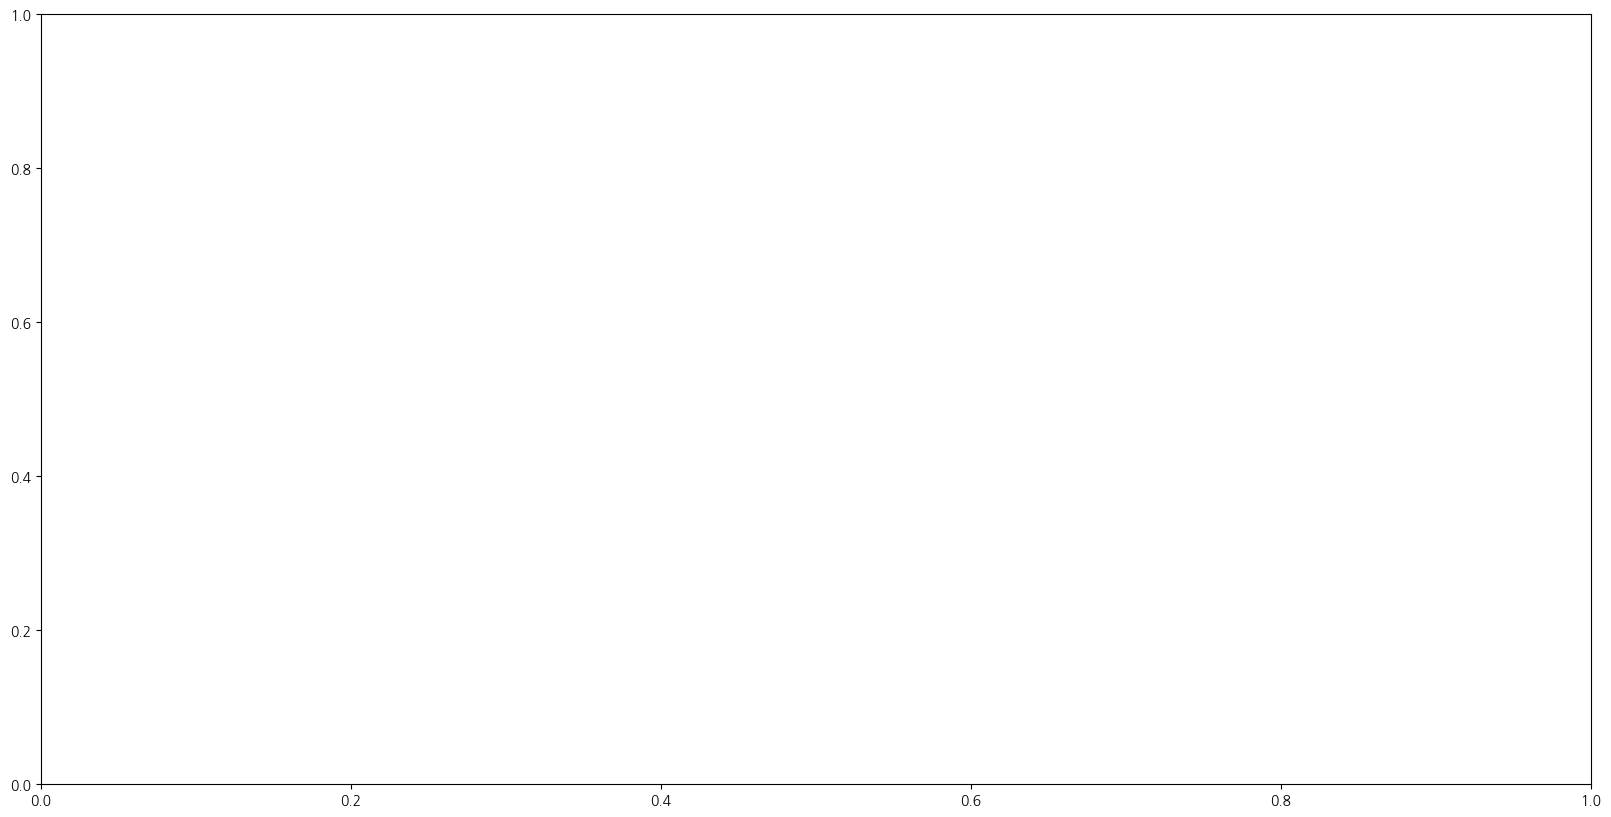

In [47]:
plt.figure(figsize=(20,10))
plt.scatter(X_test, y_test, color='black')
plt.plot(X_test, pred, color='blue', linewidth=3)
plt.show()

In [49]:
result = pd.DataFrame({'실제값':y_test, "예측값":pred})
result

,실제값,예측값
357,21.7,23.016076
337,18.5,19.175452
327,22.2,19.931333
13,20.4,19.192223
418,8.8,4.733661
...,...,...
413,16.3,9.805358
408,17.2,13.675562
80,28.0,28.487892
451,15.2,20.270360


* 아나콘다 들어가서 conda install statemodels 인스톨해주자.
* 구글에서 https://www.statsmodels.org/stable/api.html 들어가면 statsmodel에 대해서 배울 수 있어.

In [51]:
import statsmodels.api as sm

In [52]:
ols = sm.OLS(y_train, X_train)
model = ols.fit()
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                   주택가격   R-squared (uncentered):                   0.619
Model:                            OLS   Adj. R-squared (uncentered):              0.606
Method:                 Least Squares   F-statistic:                              48.84
Date:                Thu, 19 Oct 2023   Prob (F-statistic):                    1.37e-73
Time:                        17:26:27   Log-Likelihood:                         -1668.1
No. Observations:                 404   AIC:                                      3362.
Df Residuals:                     391   BIC:                                      3414.
Df Model:                          13                                                  
Covariance Type:            nonrobust                                                  
                   coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------

In [80]:
X_scaled = X_scaled[['25,000평방피트초과', '비소매상업지역비율', '찰스강경계', '가구당평균방수', '1940년이전건축비율', '직업센터접근성', '도로접근성', '학생/교사비율', '하위계층비율']]

In [81]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state = 7)

In [82]:
ols = sm.OLS(y_train, X_train)
model = ols.fit()
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                   주택가격   R-squared (uncentered):                   0.618
Model:                            OLS   Adj. R-squared (uncentered):              0.609
Method:                 Least Squares   F-statistic:                              70.92
Date:                Thu, 19 Oct 2023   Prob (F-statistic):                    6.01e-77
Time:                        18:12:26   Log-Likelihood:                         -1668.7
No. Observations:                 404   AIC:                                      3355.
Df Residuals:                     395   BIC:                                      3391.
Df Model:                           9                                                  
Covariance Type:            nonrobust                                                  
                   coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------

## 릿지 회귀분석(Ridge Regression)
* L2 규제, w(가중치)의 절대값을 가능한 한 작게 만들어서 0에 가깝게 만든다.
* 모든 특성(Feature, 독립변수)이 주는 영향력을 최소화
* 변수가 별로 없을 때. 변수를 지우지는 않음.

In [69]:
from sklearn.linear_model import Ridge
ridge = Ridge()
ridge.fit(X_train, y_train)
pred2 = ridge.predict(X_test)
print('coef: ', ridge.coef_)
print('intercept: ', ridge.intercept_)
print('MSE: ', mean_squared_error(y_test, pred2))
print('RMSE: ', sqrt(mean_squared_error(y_test, pred2)))
print('R-squared: ', r2_score(y_test, pred2))

coef:  [-0.43695105  0.36204928  0.1102694   2.76112827 -2.55323409  3.92371235
 -0.55838402 -3.86042291  4.61349395 -3.77318081 -2.53778791  0.21172457
 -3.86189886]
intercept:  22.928047961074952
MSE:  34.29618318798121
RMSE:  5.8562943221785915
R-squared:  0.575575170180892


* MES, RMSE는 오차니까 숫자가 적을수록 좋은거야.

In [73]:
for alpha in [0,0.1,1,10,100]:
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_train, y_train)
    pred2 = ridge.predict(X_test)
    print("alpha: ", alpha)
    print("-"*50)
    print('coef: ', ridge.coef_)
    print('intercept: ', ridge.intercept_)
    print('MSE: ', mean_squared_error(y_test, pred2))
    print('RMSE: ', sqrt(mean_squared_error(y_test, pred2)))
    print('R-squared: ', r2_score(y_test, pred2))
    print(alpha, f"훈련 세트 점수: {ridge.score(X_train, y_train)}")
    print(alpha, f"훈련 세트 점수: {ridge.score(X_test, y_test)}")
    print()

alpha:  0
--------------------------------------------------
coef:  [-0.44811816  0.38091882  0.28142521  2.79225761 -2.66236681  3.89109958
 -0.54238383 -3.93198683  5.31609421 -4.45216524 -2.57479921  0.21186124
 -3.899069  ]
intercept:  22.90779340154933
MSE:  34.05648134887465
RMSE:  5.8357931208084
R-squared:  0.5785415472763403
0 훈련 세트 점수: 0.7698532963729757
0 훈련 세트 점수: 0.5785415472763403

alpha:  0.1
--------------------------------------------------
coef:  [-0.44684005  0.37879135  0.26137353  2.79008099 -2.65073915  3.89473775
 -0.5443916  -3.92491877  5.23541364 -4.37326459 -2.57073537  0.21182976
 -3.89512865]
intercept:  22.9101125154965
MSE:  34.081827791997796
RMSE:  5.837964353436718
R-squared:  0.5782278779752961
0.1 훈련 세트 점수: 0.7698508329309773
0.1 훈련 세트 점수: 0.5782278779752961

alpha:  1
--------------------------------------------------
coef:  [-0.43695105  0.36204928  0.1102694   2.76112827 -2.55323409  3.92371235
 -0.55838402 -3.86042291  4.61349395 -3.77318081 -2.5

* 알파 규제를 강하게하면 강하게 할 수록 수치가 내려간다.
* 릿지 알파 규제는 왜 할까? - 과적합을 막기 위해서.

## Lasso(라쏘 ,L1규제)
* w(가중치)의 절대값에 패널티를 부여해서 0으로 만들고 제거를 해버림.
* 특성(feature, 독립변수)이 너무 많을 때 유용
* 변수가 많아서 쳐내고싶을 때 사용

In [76]:
from sklearn.linear_model import Lasso
lasso = Lasso()
lasso.fit(X_train, y_train)
pred = lasso.predict(X_test)
print('coef: ', lasso.coef_)
print('intercept: ', lasso.intercept_)
print('MSE: ', mean_squared_error(y_test, pred))
print('RMSE: ', sqrt(mean_squared_error(y_test, pred)))
print('R-squared: ', r2_score(y_test, pred))
print(alpha, f"훈련 세트 점수: {lasso.score(X_train, y_train)}")
print(alpha, f"훈련 세트 점수: {lasso.score(X_test, y_test)}")
print()

coef:  [-0.44924038  0.01910541 -0.          0.         -0.          4.49033756
 -0.         -0.         -0.         -0.         -1.08680653  0.2917393
 -1.94742591]
intercept:  22.98810486022828
MSE:  45.22996794500432
RMSE:  6.72532288778794
R-squared:  0.44026653512541625
100 훈련 세트 점수: 0.6928716917521303
100 훈련 세트 점수: 0.44026653512541625



## ElasticNet(엘라스틱 넷 회귀분석)

In [79]:
from sklearn.linear_model import ElasticNet
el_net = ElasticNet()
el_net.fit(X_train, y_train)
pred2 = el_net.predict(X_test)
print('coef: ', el_net.coef_)
print('intercept: ', el_net.intercept_)
print('MSE: ', mean_squared_error(y_test, pred2))
print('RMSE: ', sqrt(mean_squared_error(y_test, pred2)))
print('R-squared: ', r2_score(y_test, pred2))
print(alpha, f"훈련 세트 점수: {el_net.score(X_train, y_train)}")
print(alpha, f"훈련 세트 점수: {el_net.score(X_test, y_test)}")
print()

coef:  [-0.56280634  0.30242972 -0.02071502  0.         -0.03168404  3.12921805
 -0.         -0.         -0.         -0.         -1.19226235  0.31400883
 -1.77231844]
intercept:  22.93406535779871
MSE:  42.89934748180562
RMSE:  6.549759345335187
R-squared:  0.4691086132086908
100 훈련 세트 점수: 0.6505728229705883
100 훈련 세트 점수: 0.4691086132086908

